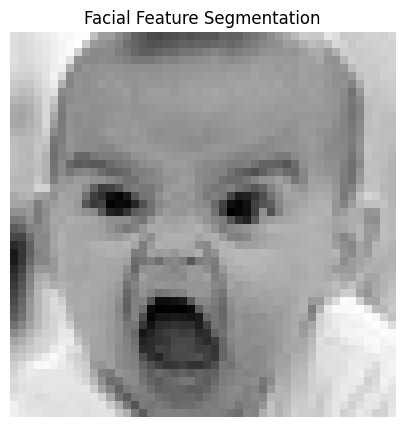

In [1]:
import cv2
from matplotlib import pyplot as plt

# Load the image
image_path = '/content/Training_143373.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Haar Cascade Classifiers for face, eyes, and mouth
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_mouth.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterate through faces and detect eyes and mouth within each face
for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Define regions of interest for eyes and mouth
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    # Detect eyes in the face region
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # Detect mouth in the lower half of the face region
    mouth = mouth_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=15, minSize=(40, 40))
    for (mx, my, mw, mh) in mouth:
        # Adjust mouth position as it often detects below the nose
        my = int(my + 0.6 * mh)
        cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (0, 0, 255), 2)
        break  # Typically, we are only interested in the first detected mouth

# Display the result
plt.figure(figsize=(10, 5))
plt.title('Facial Feature Segmentation')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
